<a href="https://colab.research.google.com/github/Nahom32/Customer_Segmentation/blob/credit-tracking/notebooks/Customer_Credit_Score_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rationale
This dataset offers a rare and comprehensive view of banking behavior by combining customer demographics with transactional data from an Indian bank, enabling robust analysis of financial patterns in a rapidly digitizing economy. With over 1 million anonymized transactions linked to demographic attributes, it provides a unique opportunity to explore how cultural, regional, and socioeconomic factors influence banking habits in a diverse market like India.


#Dependency Imports


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
customer_train = pd.read_csv('/content/drive/My Drive/train.csv')
customer_test = pd.read_csv('/content/drive/My Drive/test.csv')

<ipython-input-81-0e24816b0d1e>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_train = pd.read_csv('/content/drive/My Drive/train.csv')


###Training dataset overview



In [82]:
customer_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


###Testing data-set overview

In [ ]:
customer_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [ ]:
customer_train_shape = customer_train.shape
customer_test_shape = customer_test.shape
print(f'The shape of the training dataset is {customer_train_shape}')
print(f'The shape of the testing dataset is {customer_test_shape}')


The shape of the training dataset is (100000, 28)
The shape of the testing dataset is (50000, 27)


###Exploratory Data Analysis


In [83]:
customer_train_cleaned = customer_train.dropna()
customer_train_cleaned.shape

(53049, 28)

In [84]:
customer_train_cleaned = customer_train_cleaned.drop_duplicates()

customer_train_cleaned.shape

(53049, 28)

In [85]:
classes = customer_train_cleaned['Credit_Score'].unique()
print(classes)

['Good' 'Standard' 'Poor']


In [86]:
map_values = {'Poor': 0, 'Standard': 1, 'Good': 2}
customer_train_cleaned['Credit_Score'] = customer_train_cleaned['Credit_Score'].map(map_values)

In [87]:
customer_train_cleaned.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,2
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,2
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,1
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,2
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,1


In [88]:
customer_train_cleaned.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
count,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000
mean,4024.502617,16.842806,22.787253,76.272352,21.994119,27.062866,32.219031,1445.924761,0.850440
std,3094.967739,115.605025,129.339640,479.226709,15.220406,187.185825,5.057398,8407.429893,0.671379
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250,4.462837,0.000000
25%,1575.345833,4.000000,4.000000,8.000000,10.000000,3.000000,28.046338,41.244418,0.000000
50%,2991.016667,6.000000,6.000000,15.000000,19.000000,6.000000,32.251786,78.418272,1.000000
75%,5712.553333,8.000000,7.000000,22.000000,29.000000,9.000000,36.408991,169.286269,1.000000
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2594.000000,49.564519,82331.000000,2.000000


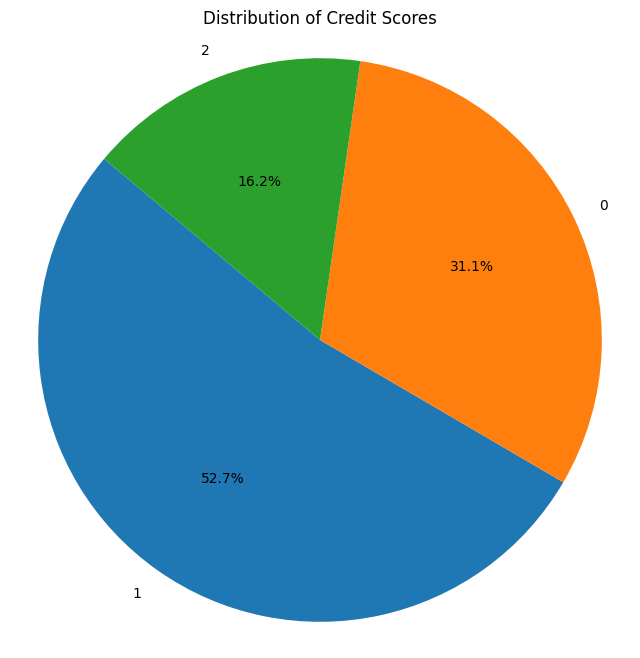

In [89]:
target_counts = customer_train_cleaned['Credit_Score'].value_counts()
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [90]:
customer_train_cleaned.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
def generate_month_mapping():
    """Generates a dictionary mapping month names to their numerical values."""
    month_names = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
    month_mapping = {month: index + 1 for index, month in enumerate(month_names)}
    return month_mapping
month_map = generate_month_mapping()
print(month_map)

{'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}


In [91]:
customer_train_cleaned['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Mechanic', 'Writer', 'Accountant', 'Architect', 'Musician',
       'Developer'], dtype=object)

In [ ]:
customer_train_cleaned['Changed_Credit_Limit']

,Changed_Credit_Limit
0,11.27
6,11.27
8,5.42
9,7.42
10,5.42
...,...
99994,9.5
99995,11.5
99996,11.5
99997,11.5


In [92]:
customer_train_cleaned.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
count,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000
mean,4024.502617,16.842806,22.787253,76.272352,21.994119,27.062866,32.219031,1445.924761,0.850440
std,3094.967739,115.605025,129.339640,479.226709,15.220406,187.185825,5.057398,8407.429893,0.671379
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250,4.462837,0.000000
25%,1575.345833,4.000000,4.000000,8.000000,10.000000,3.000000,28.046338,41.244418,0.000000
50%,2991.016667,6.000000,6.000000,15.000000,19.000000,6.000000,32.251786,78.418272,1.000000
75%,5712.553333,8.000000,7.000000,22.000000,29.000000,9.000000,36.408991,169.286269,1.000000
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2594.000000,49.564519,82331.000000,2.000000


In [ ]:
customer_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53049 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Month                     53049 non-null  object 
 3   Name                      53049 non-null  object 
 4   Age                       53049 non-null  object 
 5   SSN                       53049 non-null  object 
 6   Occupation                53049 non-null  object 
 7   Annual_Income             53049 non-null  object 
 8   Monthly_Inhand_Salary     53049 non-null  float64
 9   Num_Bank_Accounts         53049 non-null  int64  
 10  Num_Credit_Card           53049 non-null  int64  
 11  Interest_Rate             53049 non-null  int64  
 12  Num_of_Loan               53049 non-null  object 
 13  Type_of_Loan              53049 non-null  object 
 14  Delay_from_

In [93]:
#customer_train_cleaned['Monthly_Balance'] = customer_train_cleaned['Monthly_Balance'].map(lambda x: x if type(x) == float else 0)
customer_train_continous = customer_train_cleaned[['Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_Credit_Inquiries','Credit_Utilization_Ratio','Total_EMI_per_month','Monthly_Balance','Credit_Score']]

In [94]:
customer_train_continous.head()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Score
0,1824.843333,3,4,3,3,4.0,26.822620,49.574949,312.49408867943663,2
6,1824.843333,3,4,3,3,4.0,22.537593,49.574949,244.5653167062043,2
8,3037.986667,2,4,6,3,2.0,24.464031,18.816215,470.69062692529184,1
9,3037.986667,2,4,6,7,2.0,38.550848,18.816215,484.5912142650067,2
10,3037.986667,2,1385,6,3,2.0,33.224951,18.816215,466.46647639764313,1


In [95]:
import re

def convert_credit_history_age(age_str):
    """Converts a string like '22 Years and 1 Months' to a float representing years."""
    if not isinstance(age_str, str): #handles if a non-string is passed.
      return 0

    match = re.match(r'(\d+) Years? and (\d+) Months?', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years + months / 12.0
    else:
        return 0

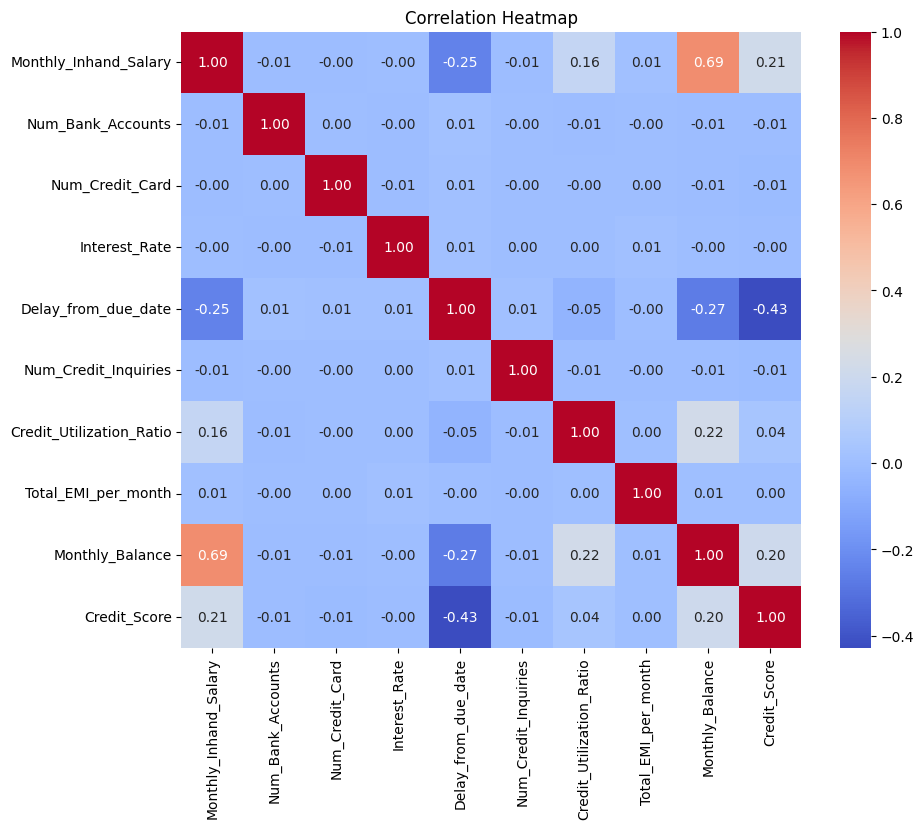

In [96]:
# customer_train_cleaned['Month'] = customer_train_cleaned['Month'].map(month_map)
# X = customer_train_cleaned[[col for col in customer_train_cleaned.columns if col != 'Credit_Score']]
# y = customer_train_cleaned['Credit_Score']
# X= X.drop(['ID','Customer_ID','Occupation','SSN'], axis=1)
customer_train_continous = customer_train_continous.replace('__-333333333333333333333333333__', np.nan)

# Convert all columns to numeric, coercing errors to NaN
for col in customer_train_continous.columns:
    customer_train_continous[col] = pd.to_numeric(customer_train_continous[col], errors='coerce')
correlation_matrix = customer_train_continous.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()






In [98]:
customer_train_continous.head()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Score
0,1824.843333,3,4,3,3,4.0,26.822620,49.574949,312.494089,2
6,1824.843333,3,4,3,3,4.0,22.537593,49.574949,244.565317,2
8,3037.986667,2,4,6,3,2.0,24.464031,18.816215,470.690627,1
9,3037.986667,2,4,6,7,2.0,38.550848,18.816215,484.591214,2
10,3037.986667,2,1385,6,3,2.0,33.224951,18.816215,466.466476,1


In [102]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Assuming you have a DataFrame 'df' and 'Credit_Score' is your target
# and all of your other data is numerical.
# Separate features (X) and target (y)
X = customer_train_continous.drop('Credit_Score', axis=1) #removes the credit score column.
X_columns = X.columns
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median'
X = imputer.fit_transform(X)  # Apply imputation to your feature data
y = customer_train_continous['Credit_Score']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

customer_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X_columns), pd.Series(y_resampled, name='Credit_Score')], axis=1)

print(customer_resampled['Credit_Score'].value_counts())

Credit_Score
2    27951
1    27951
0    27951
Name: count, dtype: int64


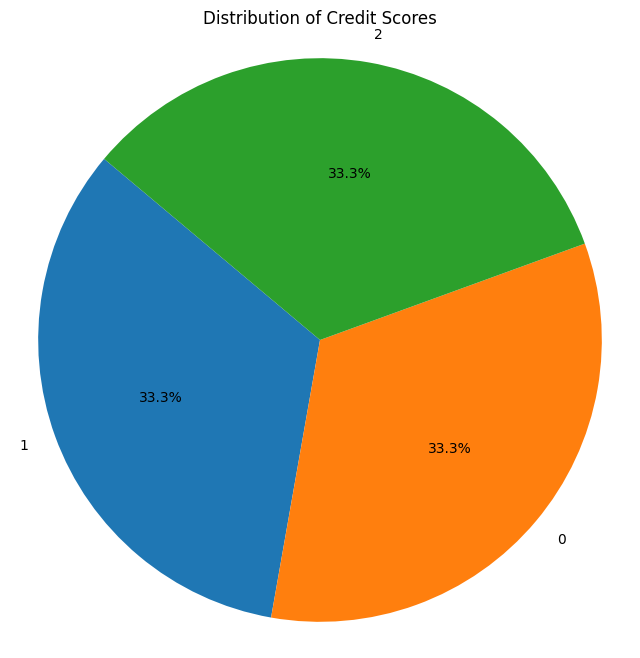

In [103]:
customer_counts = customer_resampled['Credit_Score'].value_counts()
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(customer_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = customer_resampled.drop('Credit_Score', axis=1)
y = customer_resampled['Credit_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(objective="multi:softmax", num_class=len(set(y))),
    "SVM": SVC(kernel='rbf', decision_function_shape='ovr'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("=" * 50)


Model: Random Forest
Accuracy: 0.8322
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      5590
           1       0.81      0.74      0.77      5590
           2       0.86      0.90      0.88      5591

    accuracy                           0.83     16771
   macro avg       0.83      0.83      0.83     16771
weighted avg       0.83      0.83      0.83     16771

Model: Gradient Boosting
Accuracy: 0.7391
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      5590
           1       0.70      0.62      0.66      5590
           2       0.78      0.82      0.80      5591

    accuracy                           0.74     16771
   macro avg       0.74      0.74      0.74     16771
weighted avg       0.74      0.74      0.74     16771

Model: XGBoost
Accuracy: 0.7815
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      5590
           1     

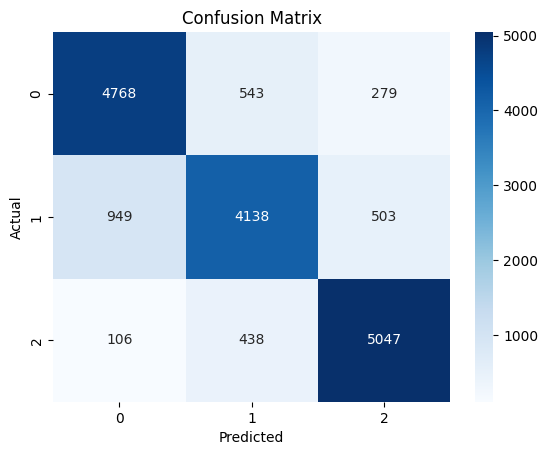

In [107]:
from sklearn.metrics import confusion_matrix

# Example for Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [108]:
import pickle
with open('credit_score_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [109]:
from google.colab import files

# Download the file
files.download('credit_score_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>